In [1]:
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])


dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1]

z = StandardScaler()
dataset6[["x","y"]] = z.fit_transform(dataset6)
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


In [3]:
print(dataset6)

     1.578527021  1.408111159         x         y
0       1.748206     0.441915  1.760863  0.448118
1       1.523151     0.681521  1.534861  0.688524
2       1.318949     0.362971  1.329800  0.368909
3       0.977164    -0.373589  0.986577 -0.370113
4       1.065915    -0.159822  1.075702 -0.155631
..           ...          ...       ...       ...
294    -0.522015     1.682249 -0.518909  1.692598
295    -0.195039     1.177602 -0.190558  1.186264
296     0.004994     1.111269  0.010316  1.119710
297    -1.954443     0.506557 -1.957364  0.512976
298     0.159848     0.369740  0.165822  0.375701

[299 rows x 4 columns]


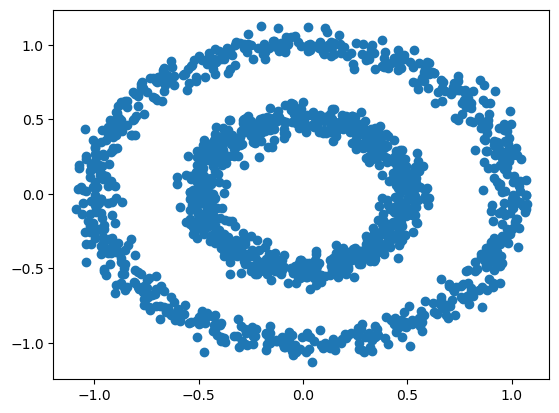

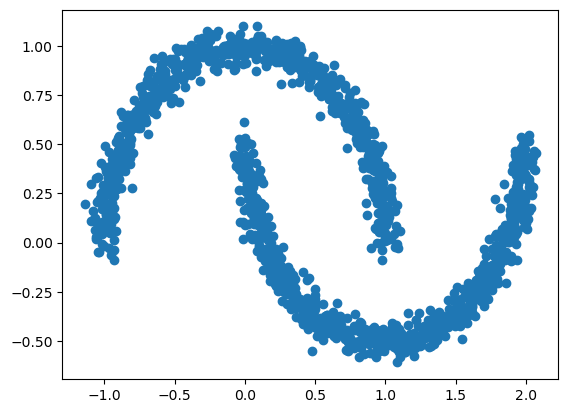

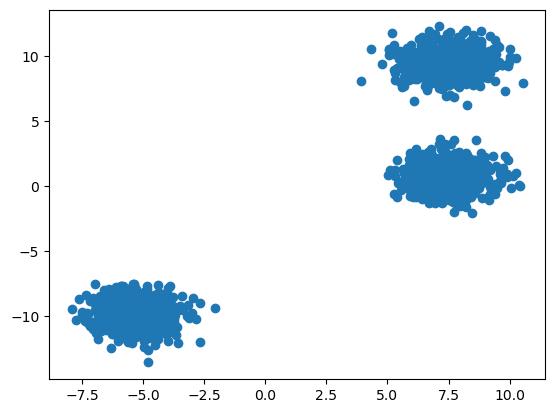

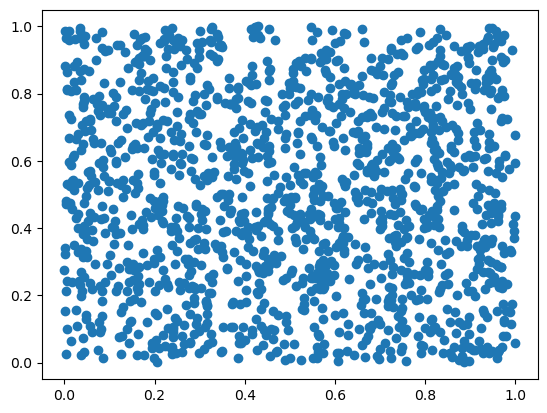

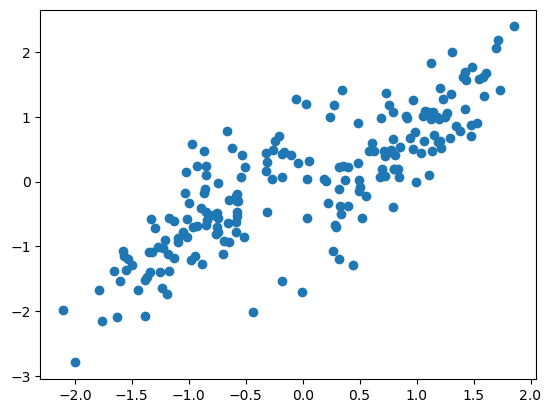

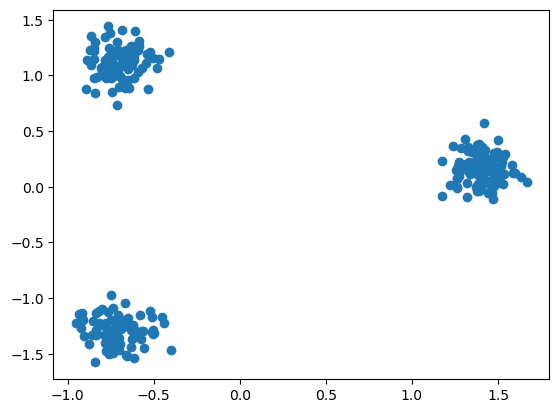

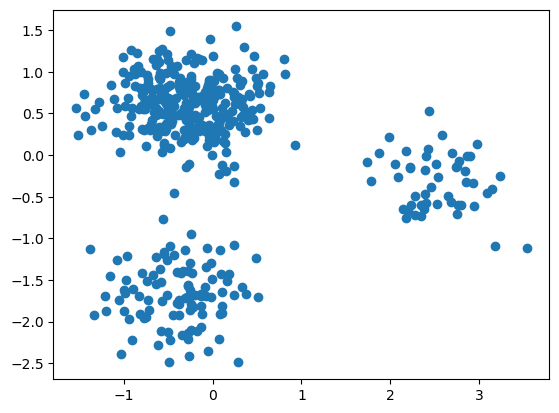

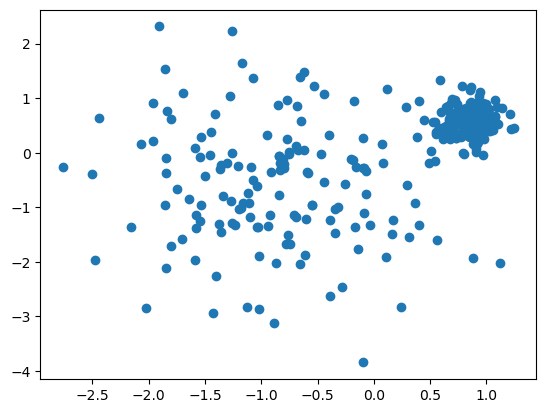

In [4]:
#all data set in 
data = [dataset1 , dataset2 , dataset3 ,dataset4 ,dataset5,dataset7 ,dataset8 , dataset9]
for i in data :
    plt.scatter( i.iloc[:, 0], i. iloc[:, 1])
    plt.show()

In [5]:
for i in data : 
    i[["x" , "y"]] = z.fit_transform(i)

In [6]:
for df in data:
    df.columns = df.columns.astype(str)

C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

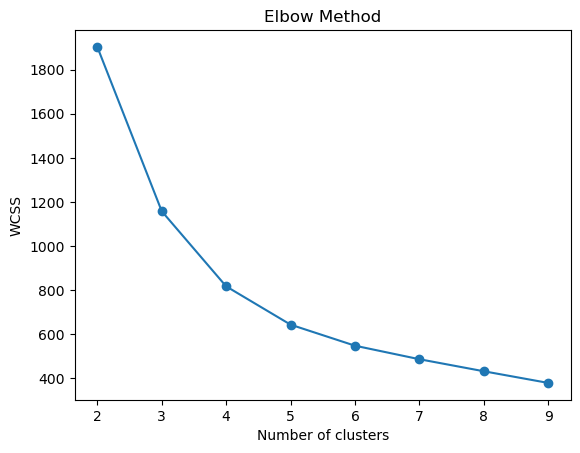

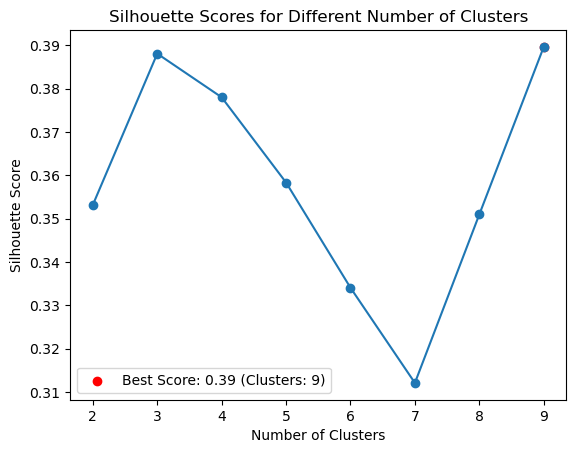

In [7]:
n_clusters_range = range(2, 10)
silhouette_scores = []
wcss = []                                

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(dataset1[["x", "y"]])
    silhouette_avg = silhouette_score(dataset1[["x", "y"]], labels)
    silhouette_scores.append(silhouette_avg)
    wcss.append(kmeans.inertia_)                                   

# Find the best silhouette score and the corresponding number of clusters
best_score = max(silhouette_scores)
best_clusters = n_clusters_range[silhouette_scores.index(best_score)]

plt.plot(n_clusters_range, wcss, '-o')                                
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.scatter(best_clusters, best_score, color='red', label=f'Best Score: {best_score:.2f} (Clusters: {best_clusters})')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.legend()
plt.show()

In [8]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(dataset1[["x", "y"]])

C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset1[["x", "y"]])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = model.predict(dataset1[["x", "y"]])

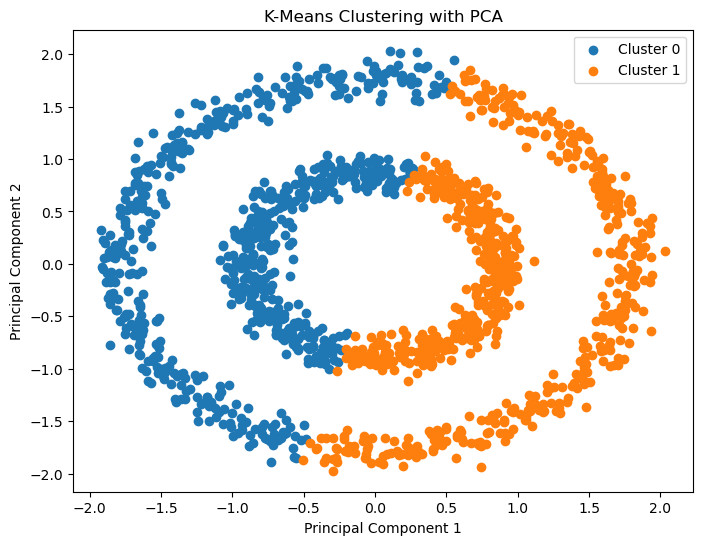

In [12]:
plt.figure(figsize=(8, 6))

for cluster in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [14]:
dbscan = DBSCAN(eps=0.35, min_samples=5)
labels = dbscan.fit_predict(dataset1[["x", "y"]])

In [15]:
silhouette_score(dataset1[["x", "y"]], labels)

0.11461215961858477

In [18]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset1[["x", "y"]])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

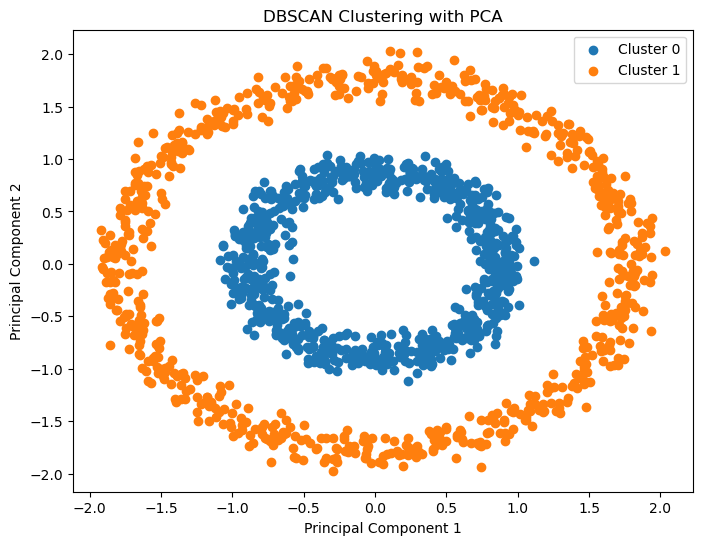

In [20]:
plt.figure(figsize=(8, 6))

for cluster in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()